그러나 너희는 택하신 족속이요 왕 같은 제사장들이요 거룩한 나라요 그의 소유가 된 백성이니 이는 너희를 어두운 데서 불러 내어 그의 기이한 빛에 들어가게 하신 이의 아름다운 덕을 선포하게 하려 하심이라 (벧전2:9)

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University


# Chapter 5. 이진 분류(Binary Classficiation)

선형 회귀를 확장하여 분류(Classification)모델을 만들어 봅니다. 분류 모델은 데이터를 분류하는 방법을 학습이다. 예를 들면, 암종양을 분류하는 모델은 "암 종양인지 아닌지'를 분류합니다. 이런 모델은 특별히 이진 분류라고 부릅니다. 이진 분류를 위한 로지스틱 회귀(logistic regression)에 대해서도 알아 봅니다. 로지스틱 회귀를 이해하고 나면, 여러분은 기계학습과 딥러닝에 한층 더 익숙해져 있을 것입니다. 

    5.1 퍼셉트론
    5.2 시그모이드 함수
    5.2 로지스틱 손실함수를 경사하강법에 적용하기
    5.3 이진 분류를 위한 데이터셋 준비
    5.4 로지스틱 회귀 뉴론 만들기
    5.5 로지스틱 회귀 뉴론의 단층 신경망 만들기
    5.6 사이킷런으로 로지스틱 회귀 수행하기


# Chapter 5.1  퍼셉트론(Perceptron)

## 1. 퍼셉트론(Perceptron)

인공 신경망을 구성하는 기본 단위는 __인공 뉴론__입니다. 여러 인공 뉴론들을 체계적으로 연결하여 __인공 신경망__을 구성합니다. 

- 인공 신경망의 각 인공 뉴론을 전산 과학에서는 노드$^{node}$, 유닛$^{unit}$ 혹은 간단히 뉴론이라고 하며, __퍼셉트론__이라 부르기도 합니다. 
- 퍼셉트론은 인공 신경망의 한 종류로 인식되며, 1957년에 코넬 항공 연구소의 프랑크 로젠블라트$^{Frank \ Rosenblatt}$가 고안한 알고리즘입니다. 
- 그가 발표한 논문(The perceptron, a perceiving and recognizing automaton Project Para.)에서 하나의 뉴론이 정보를 받은 후, 그 정보를 다음 뉴론으로 전달할 것인가 전달하지 않을 것인가를 결정하기 위하여, 자기가 받은 __입력 특성$^{features}$__에 곱하는 최적의 __가중치$^{weights}$__를 자동적으로 학습하는 퍼셉트론 알고리즘을 제안하였습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/Rosenblatt.png?raw=true" width=200></img>
<center> 그림 1: 프랑크 로젠블라트 </center>
<center> (출처 : https://commons.wikimedia.org/wiki/File:Rosenblatt_21.jpg)</center>

우리는 앞 강의에서 하나의 입력 값과 하나의 가중치를 가지고 있었지만, 여기서는 입력 신호와 그에 가중치가 하나 혹은 그 이상 많아지고, 마지막 단계에서 샘플을 이진 분류하기 위하여 계단 함수(step function)을 사용합니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-neuron3.png?raw=true" width=500></img>
<center> 그림 2: 간단한 페셉트론의 구조 </center>

지금까지 우리가 다룬 뉴론에서는 입력 $x$가 하나였지만, 이제는 둘, $x_1, x_2$로 늘어났고, 따라서 가중치도 같은 수로 증가 되었습니다. 뉴론은 입력 신호를 받아 z를 만듭니다. 즉, 다음 수식에 의해 z를 만들고, 우리는 이 수식을 __'선형 함수'__ 라고 부르겠습니다. 

\begin{align}
z = w_1x_1 + w_2x_2 + b  \tag{1}
\end{align}

계단 함수는 $z$가 0보다 크거나 같으면 1로 0보다 작으면 -1로 분류합니다. 즉, 다음 연산을 진행합니다. 

\begin{align} 
  y &= 
  \begin{cases}
   \ 1 & \text{$if \ z \ge 0$} \\
   \ -1 & \text{$otherwise$} \\ \tag{2}
  \end{cases}
\end{align}  


이때 1을 양성 클래스(postive class) -1을 음성 클래스(negative class)라고 부르면 위의 함수를 그래프로 그리면 다음과 같이 계단 모양이 됩니다. 그래서 계단 함수라고 부르게 된 것입니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-neuron4.png?raw=true" width=300></img>
<center> 그림 3: 계단 함수(step function) </center>

이제 퍼셉트론이 어떤 구조로 되어 있는 알게 되었습니다. 쉽게 말해 퍼셉트론은 선형 함수를 통과한 값 $z$를 계단 함수로 보내 0보다 큰지 작은지 검사하여 1과 -1로 분류하는 아주 간단한 알고리즘입니다. 퍼셉트론은 계단 함수의 결과를 사용하 가중치와 편향을 조정합니다. 

그럼 이제부터 여러 개의 특성을 사용하여 문제를 해결하는 경우가 많이 나오므로,다음과 같은 퍼셉트론에도 익숙해져야 합니다.

\begin{align}
z = w_1x_1 + w_2x_2 + b  \tag{1}
\end{align}

위의 식에서 $w_1x_1$은 첫번째 특성의 가중치와 입력입니다. 이를 응용하면 특성이 $n$개인 선형함수를 다음과 같이 표기할 수 있습니다. 

\begin{align}
z = w_1x_1 + w_2x_2 + ... + w_nx_n + b  \tag{3}
\end{align}

그러나, 연구자들은 이렇게 장황하게 늘어놓은 식을 좋아하지 않습니다. 매번 쓰기도 번거롭죠. 그래서 덧셈을 축약해서 표현하는 시그마($\sum$)기호를 사용하여 위 식을 다음과 같이 표기합니다. 

\begin{align}
z = b + \sum_{i=1}^{n} w_ix_i  \tag{4}
\end{align}

이때 상수 항(b)은 시그마 기호 뒤가 아니라 앞에 두는 것이 좋습니다. 상수 항을 시그마 기호 뒤에 두면 시그마 기호에 상수 항이 포함되었다고 착각할 수 있기 때문입니다.

다음 그림은 여러 특성을 가진 퍼셉트론이 다수의  입력$^{input}$을 받아서 하나의 결과를 출력$^{output}$합니다. 그의 구성을 좀 더 자세히 설명한 그림입니다. 가중치를 조정하는 과정(4)에서 그 정도를 제어하기 위하여 학습률(learning rate) $\eta$를 사용하기도 합니다. 이러한 퍼셉트론 알고리즘은 사이킷런 패키지에서 Perceptron이란 이름의 클래스를 제공합니다.  

좀 더 상세한 내용을 페셉트로의 구현은 K-MOOC "파이썬으로 배우는 기계학습"을 참고하길 바랍니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/Perceptron-process.png?raw=true" width=800></img>
<center>그림 4: 퍼셉트론 알고리즘의 전체 과정</center>

## 2. 아달린(Adaline) - 적응형 선형뉴론

퍼셉트론이 등장한 이후, 1960년에 스탠포드 대학의 버나드 위드로우(Bernard Widrow)와 테드 호프(Tedd Hoff)가 퍼셉트론을 개선한 __적응형 선형 뉴런(Adaptive Linear Neuron)__을 발표하였습니다. 적응형 선형 뉴론은 아달린(Adaline)이라고도 부릅니다. 
- 아달린은 선형함수의 결과를 __학습에 사용합니다__. 
- 계단 함수의 결과는 예측에만 활용하구요. (반면에, 퍼셉트론은 계단 함수의 결과를 학습에 사용합니다)
- 역방향 계산이 계단 함수 출력 이후에 일어나지 않고, 선형 함수 출력 직후에 진행되는 점에 주목하세요. 
- 모든 샘플에 대하여 오차를 합산한 후 가중치를 조정합니다. (반면에, 퍼셉트론은 각 샘플마다 가중치를 수정합니다)

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-neuron6.png?raw=true" width=500></img>
<center> 그림 5: 아달린의 구조 </center>

이 장에서 본격적으로 공부하게 될 로지스틱 회귀는 아달린의 개선 버전이므로 이 구조를 유심히 살펴보기 바랍니다. 여기서도, 가중치를 조정하는 과정에서 그 정도를 제어하기 위하여 학습률(learning rate) $\eta$를 사용하기도 합니다. 아달린의 나머지 요소는 퍼셉트론과 동일합니다. 

다음 그림은 아달린의 구체적인 게산 방법을 보여주는데, 이에 대한 좀 더 상세한 설명과 구현은 K-MOOC "파이썬으로 배우는 기계학습"을 참고하길 바랍니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/adalineAlgorithm.png?raw=true" width="500">
<center>그림 6: 아달린 알고리즘의 상세한 개념도</center>

## 3. 로지스틱 회귀(Logistic Regression)

로지스틱 회귀는 "회귀" Regression알고리즘이 아니라 사실상 분류 알고리즘인 것에 유의하십시오. 로지스틱 회귀는 아달린에서 조금 더 발전한 형태입니다. 다음 그림을 먼저 살펴보십시오. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-neuron7.png?raw=true" width=600></img>
<center> 그림 7: 로지스틱 회귀의 구조 </center>

로지스틱 회귀는 선형 함수를 통과시켜 얻은 $z$를 임계함수(계단함수)에 보내기 전에 변형시키는데, 바로 이런 함수를 __활성화 함수(activation function)__라고 부릅니다.  

- 활성화 함수를 통과한 값이 $a$로 표현되어 있는데, 앞으로 $a$라고 하면 활성화 함수를 통과한 값이라고 이해하면 됩니다. 
- 로지스틱 회귀는 마지막 단계에서 임계 함수(threshold function)을 사용하여 예측을 수행합니다.  
- 임계함수는 아달린이나 퍼셉트론의 계단함수와 역할은 비슷하지만 활성화 함수의 출력값을 사용한다는 점이 다릅니다.  

지금은 로지스틱 회귀의 전체 구조만 살펴본 것입니다. 다음 실습을 진행하면서, 좀 더 깊이 살펴볼 것입니다. 

### 활성화 함수는 비선형 함수를 사용합니다. 

활성화 함수로는 보통 비선형 함수를 사용합니다. 다음은 비선형 함수의 한 예입니다. 

\begin{align}
p = \frac{1}{1 + e^{-z}} 
\end{align}

왜 활성화 함수는 비선형 함수를 사용할까요? 

만약 활성화 함수가 선형함수라면 어떻게 될까요? 

예를 들면, 선형 함수 $ a = w_1x_1 + w_2x_2 + ... + w_nx_n$과 활성화 함수 $y = ka$가 있다고 합시다. 그러면, 이 둘은 쌓은 수식은 다음과 같다고 할 수 있습니다. 

\begin{align}
y = k(w_1x_1 + w_2x_2 + ... + w_nx_n) 
\end{align}

두 식을 덧셈과 곱셈의 결합법칙과 분배법칙에 의하여 정리하면 다시 하나의 큰 선형 함수가 됩니다. 이렇게 되면 임계 함수 앞에 뉴론을 여러 개 쌓아도 결국 선형 함수일 것이므로 별 의미가 없습니다. 그래서, __활성화 함수는 의무적으로 비선형 함수를 사용합니다.__ 

그럼, 로지스틱 회귀에는 어떤 활성화 함수가 사용되었을까요? 로지스틱 최귀의 활성화 함수는 바로 '시그모이드(sigmoid)'함수 입니다. 이것을 곧 살펴보겠습니다. 

# Chapter 5.2 시그모이드 함수(Sigmoid fucntion)

## 1. 시그모이드 함수의 역할

우선 로지스틱 회귀의 전체 구조를 다시 살펴본 후, 시그모이드 함수가 어떤 역할을 하는지 알아 봅니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-neuron7.png?raw=true" width=600></img>
<center> 그림 1: 로지스틱 회귀의 구조 </center>

가장 왼쪽에 있는 뉴론이 선형함수이고, 선형 함수의 출력값 $z$는 다음과 같습니다. 

\begin{align}
z = b + \sum_{i=1}^{n} w_ix_i
\end{align}



그림에서 볼 수 있듯이 출력값 $z$는 활성화 함수를 통과하여 $a$가 됩니다. 

- 이때 로지스틱 회귀에서 사용하는 활성화 함수인 __시그모이드 함수는 $z$를 0 ~ 1 사이의 확률값으로 변환시켜 주는 역할을 합니다.__ 
- 즉, 시그모이드 함수를 통과한 값$a$를 암 종양 판정에 사용하면 '양성 샘플일 확률(악성 종양일 확률)'로 해석할 수 있습니다. 
- 확률은 해석하기 나름이지만 보통 $a$가 0.5(50%)보다 크면 양성 클래스, 그 이하이면 음성 클래스라고 구분합니다. 


## 2. 시그모이드 함수가 만들어지는 과정

시그모이이드 함수는 어떻게 만들까요? 

시그모이드 함수는 약간의 수학적 기교를 사용하여 만들 수 있습니다. 시그모이드 함수가 만들어지는 과정은 다음과 같습니다. 

> 오즈 비(odds ratio) > 로짓(logit) 함수 > 시그모이드(sigmoid) 함수

### 2.1 Odds Ratio 

시그모이드 함수는 오즈 비(odds ratio)라는 통계 기반으로 만들어집니다. 오지 비는 __성공 확률과 실패 확률의 비율__을 나타내는 통계이며 다음과 같이 정의합니다. 

\begin{align}
OR(odds \ ratio) = \frac{p}{1-p}  \qquad  \text{p = 성공확률}  \tag{1}
\end{align}

오브 비를 그래프로 그리면 다음과 같습니다. $p$가 0부터 1까지 증가할 때 오즈 비의 값은 처음에는 천천히 증가하지만, $p$가 1에 가까워지면 급격히 증가합니다. 오즈 비는 이정도 간단히 살펴봅니다. 

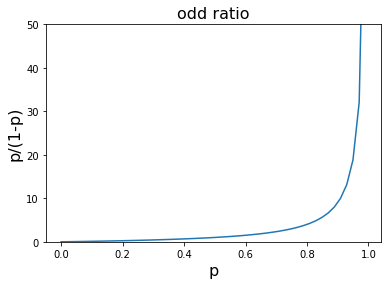

In [1]:
import numpy as np
import matplotlib.pylab as plt
p = np.linspace(0.0, 0.99)
plt.plot(p, p/(1 - p))
plt.ylim(0.0, 50.0)
plt.xlabel('p', fontsize = 16)
plt.ylabel('p/(1-p)', fontsize = 16)
plt.title('odd ratio', fontsize = 16)
plt.show()

### 2.2 로짓(logit) 함수

오즈 비에 로그 함수를 취하여 만든 함수를 __로짓 함수__라고 합니다. 로짓 함수의 식은 다음과 같습니다. 여기서는 자연 로그를 단순히 로그라고 부릅니다. 

\begin{align}
logit(p) = log(\frac{p}{1-p})  \tag{2}
\end{align}

로짓 함수는 $p$가 0.5일 때 0이 되고, $p$가 0과 1일 때 각각 무한대로 음수와 양수가 되는 특징을 가집니다. 다음은 로짓 함수의 그래프입니다. 


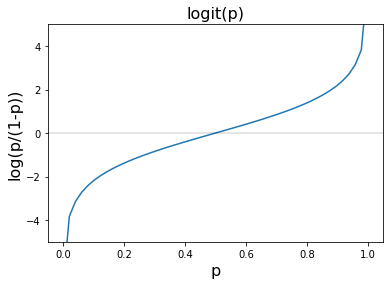

In [2]:
p = np.linspace(0.001, 0.999)
plt.plot(p, np.log(p/(1 - p)))
plt.ylim(-5, 5)
plt.xlabel('p', fontsize = 16)
plt.ylabel('log(p/(1-p))', fontsize = 16)
plt.title('logit(p)', fontsize = 16)
plt.axhline(0, color='black', linewidth=0.2)
plt.show()

로짓 함수의 세로 축을 z, 가로 축을 p로 놓으면, 확률 p가 0에서 1까지 변할 때, z가 매우 큰 음수에서 매우 큰 양수까지 변하는 것으로 생각할 수 있습니다.  이 식은 다음과 같이 쓸 수 있습니다. 

\begin{align}
log(\frac{p}{1-p}) = z \tag{3}
\end{align}

### 2.3 로지스틱 함수

위 식(3)를 다시 $z$에 대해 정리하면 다음과 같은 식이 됩니다. $z$에 대해 정리하는 이유는 가로 축을 $z$로 놓기 위해서입니다. 그리고 이 식을 __로지스틱 함수__라고 부릅니다. 

\begin{align}
 p = \frac{1}{1 + e^{-z}} 
\end{align}

로짓 함수 식(3)으로부터 로지스틱 함수 식으로 유도하는 과정은 다음과 같습니다. 

\begin{align}
log(\frac{p}{1-p}) &= z  \\
\frac{p}{1-p} &= e^z   \\
p(1 + e^z) &= e^z \\
p &= \frac{e^z}{1 + e^z} \\
p &= \frac{1}{1 + e^{-z}}
\end{align}

로지스틱 함수를 그래프로 그려보면 로짓 함수의 가로와 세로 축을 반대로 뒤집어 놓은 모양이 됩니다. 그리고 그래프는 S자 형태를 띄게 됩니다. 

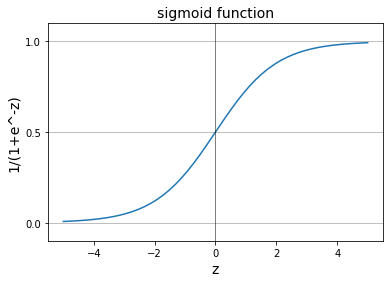

In [3]:
z = np.linspace(-5, 5)
plt.plot(z, 1/(1 + np.exp(-z)))
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('z', fontsize = 14)
plt.ylabel('1/(1+e^-z)', fontsize = 14)
plt.ylim(-0.1, 1.1)
plt.yticks([0.0, 0.5, 1.0])
plt.grid(axis='y')
plt.title('sigmoid function', fontsize = 14)
plt.show()

이 모양에서 착안하여 로지스틱 함수를 시그모이드 함수(sigmoid function)라고도 부릅니다. 

## 3. 로지스틱 회귀 중간 정리하기

로지스틱 회귀에 필요한 설명을 모두 마쳤습니다. 이제는 다음 그림을 보며 로지스틱 회귀를 정리합니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-neuron8.png?raw=true" width=600></img>
<center> 그림 2: 로지스틱 회귀의 구조 </center>

__로지스틱 회귀는 이진 분류가 목표이므로 $-\infty$부터 $\infty$의 범위를 가지는 $z$의 값을 조절할 방법이 필요했습니다.__ 그래서 시그모이드 함수를 활성화 함수로 사용한 것입니다. 이는 시그모이드 함수를 통과하면 $z$를 확률처럼 해석할 수 있기 때문입니다. 그리고, 시그모이드 함수의 확률인 $a$를 0과 1로 구분하기 위하여 마지막에 임계 함수를 사용했습니다. 

그 결과 입력 데이터 $x$는 0과 1의 값으로 나누어졌습니다. 즉, 이진 분류가 되었습니다. 드디어 로지스틱 회귀가 '이진 분류'를 하기 위한 알고리즘인 진짜 이유를 알았습니다. 

이제 무엇이 남았습니까?   

아직 우리는 가중치와 편향을 적절하게 조정할 수 있는 방법을 배우지 않았습니다. 그렇다면 로지스틱 회귀에는 어떤 손실 함수를 사용해야 할까요? 선형 회귀에서 손실 함수로 제곱 오차를 사용했듯이 분류 문제에서도 제곱 오차를 사용할 수 있을까요? 이제 로지스틱 회귀를 위한 손실 함수인 로지스틱 손실 함수에 대해 알아 보도록 합니다. 

## 참고문헌

1. 케라스 창시자에게 배우는 딥러닝, 프랑소와 숄레, 길벗
1. 핸즈온 머신러닝, 오렐리앙 제롱, 한빛미디어
1. 딥러닝 입문, 박해선, 이지스 퍼블리싱
1. 파이썬으로 배우는 기계학습, 김영섭, K-MOOC

-------
__Be joyful always!__ 1 Thes.5:16